In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler


**Building Pipelines**

In [ ]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [ ]:
pipe=Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC())])

In [ ]:
print(f'Tets score:{pipe.score(X_test,y_test)}')

Tets score:0.972027972027972


In [ ]:
param_grid={'svm__C':[0.001,0.01,0.1,1,10,100],
            'svm__gamma':[0.001,0.01,0.1,1,10,100]
            }

In [ ]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print(f"Best cross validation accuracy:{grid.best_score_}")
print(f'Test set score:{grid.score(X_test,y_test)}')
print(f'Best parameters:{grid.best_params_}')

Best cross validation accuracy:0.9812311901504789
Test set score:0.972027972027972
Best parameters:{'svm__C': 1, 'svm__gamma': 1}


In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.1 MB/s eta 0:00:00


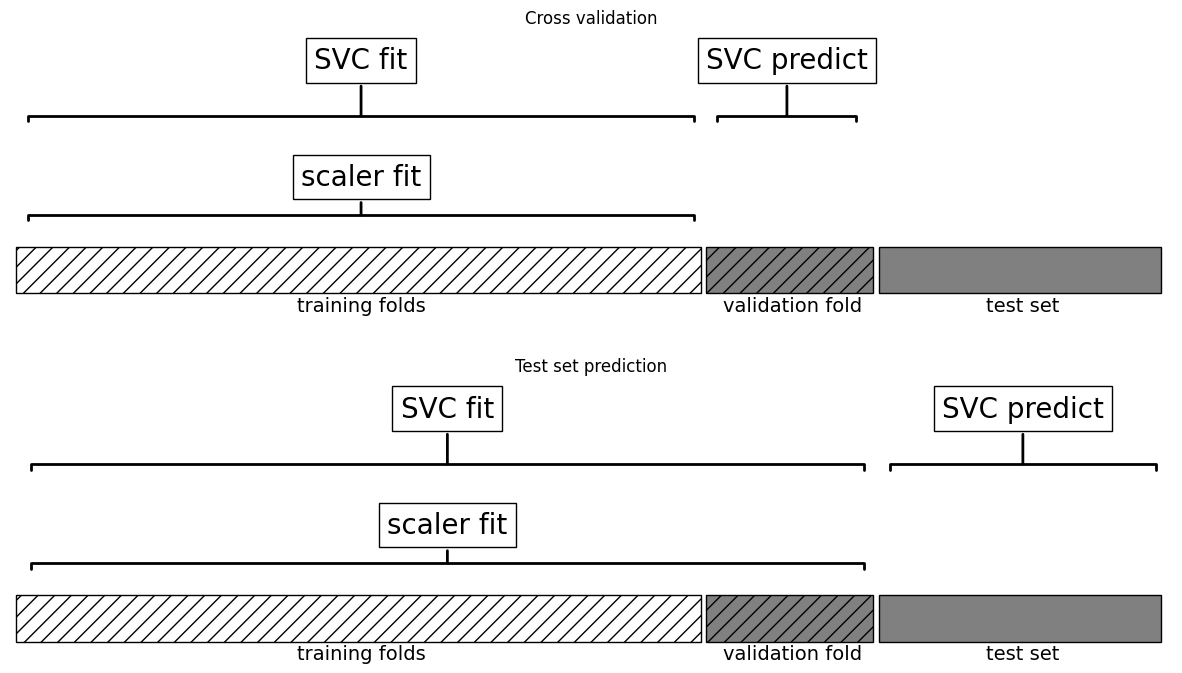

In [ ]:
import mglearn
mglearn.plots.plot_proper_processing()

# Grid-Searching Preprocessing Steps and Model Parameters

In [ ]:
#from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df.shape

(1012, 11)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,target,random_state=0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge
pipe=make_pipeline(
    StandardScaler(),PolynomialFeatures(),
    Ridge()
)

In [ ]:
param_grid={'polynomialfeatures__degree':[1,2,3],
            'ridge__alpha':[0.001,0.01,0.1,1,10,100]
            }

In [ ]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

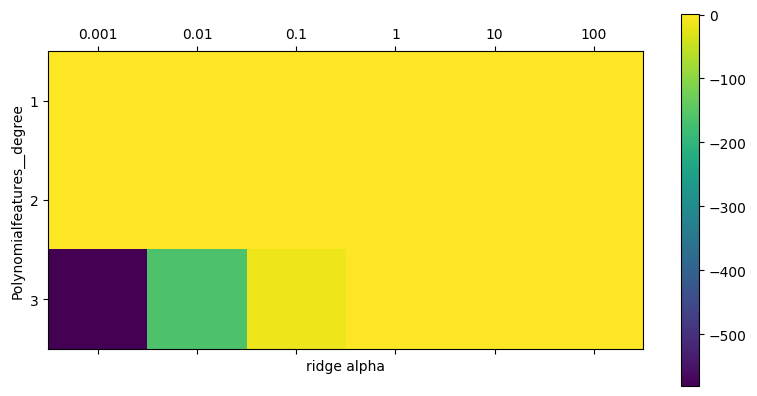

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1))
plt.xlabel("ridge alpha")
plt.ylabel("Polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])),param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),param_grid['polynomialfeatures__degree'])
plt.colorbar()


In [ ]:
print(f'Best parameters:{grid.best_params_}')


Best parameters:{'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [ ]:
print(f'Test-set score:{grid.score(X_test,y_test)}')

Test-set score:0.7683045464100128


**Run a grid search without Polynomial feature for comparision:**

In [ ]:
param_grid={'ridge__alpha':[0.001,0.01,0.1,1,10,100]}
pipe=make_pipeline(StandardScaler(),Ridge())
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print(f'Score without poly feature:{grid.score(X_test,y_test)}')

Score without poly feature:0.6272671927504456


**Grid-Searching which model to use**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe=Pipeline([('preprocessing',StandardScaler()),('classifier',SVC())])

In [ ]:
param_grid=[
    {'classifier':[SVC()],'preprocessing':[StandardScaler(),None],
      'classifier__gamma':[0.001,0.01,0.1,1,10,100],
     'classifier__C':[0.001,0.01,0.1,1,10,100]
     },
    {'classifier':[RandomForestClassifier(n_estimators=100)],
     'preprocessing':[None],
      'classifier__max_depth':[0.001,0.01,0.1,1,10,100],
     'classifier__max_features':[1,2,3]
     }
]

In [ ]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)

In [ ]:
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC()],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler(), None]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                          'classifier__max_features': [1, 2, 3],
                          'preprocessing': [None]}])

In [ ]:
print(f'Best params:{grid.best_params_}')
print(f'Best Cross-validation score:{grid.best_score_}')
print(f'Test score:{grid.score(X_test,y_test)}')

Best params:{'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
Best Cross-validation score:0.9858823529411765
Test score:0.9790209790209791
